# Introduction to Basic Data Visualization With Python For ICOS 2018

## *Analyzing the Global Temperatures Differences from Average from 1880 - 2017 Along with North American Bird Species Migratory Patterns*


Welcome to Thursday's data visualization class! Let's take a moment to quickly review what we learned as we get everyone set up - 

## Within the ICOS Summer Big Data Camp you have learned:

### Reviewing - What is Jupyter?

Jupyter is a interactive environment (this "notebook") where we can explore how a programming language ie Python works. You can "run" various cells at a time by hitting shift-enter OR by hitting run after selecting a cell. 

To edit a cell: double click. 
To make a text box cell: use the Cell -> Markdown option

I like to think of this as a display format which is mixed text like this box and code in the next box - we will be doing the first lab reports using Jupyter. 

### Reviewing - What is Python and why are we using it?

Python is an object oriented programming language. This means it has 'objects' which have certain rules or methods which you can access to run computer programming. We've seen this as we use pandas dataframes (objects) to analyze data. 

So far we've used both the command line and Jupyter (through our bulk installation of Anaconda) to read in data from a text file and some basics of Python (the programming commands) for data analysis through utilizing the Jupyter environment (this display).


## What are we doing TODAY? 

Our goal will be to read in data, look at data, and above all plot data to inform you and your colleagues about said data. All useful things. You will learn and review how to: 

- Read in a CSV (comma seperated data file) into a data format for analysis
- Plotting Basics (line plots, bar charts, and colors)
- Indexing (simple using .loc and boolean indexing)
- Use hex codes for Colors
- Use datetime objects
- And best of all...create line, bar, and scatter plots.

IF AND ONLY IF WE HAVE EXTRA TIME
- Create simple legends
- Use datetime objects as an index in a Pandas dataframe
- How to use Seaborn
- Plot many plots, on 1 figure

By the end of this lab you should be able to: read in simple data from CSV, make a line plot / bar chart, and know that matplotlib (Python's plotting package) is your friend.

Additional materials and resources on the data in this lesson for referencing: 

- The temperature dataset used in this lab is one of the highlighted datasets in the National Climate Asssesment (3rd edition circa 2014. See [Figure 2.2 / 2.3](https://nca2014.globalchange.gov/report/our-changing-climate/observed-change)). These are interactive, feel free to click around. The fourth edition part 1 came out recently in [2017](https://science2017.globalchange.gov/chapter/front-matter-about/). 
    
- The same data are presented in this figure by [Huber and Knutti, 2011](https://www.nature.com/articles/ngeo1327.pdf). Check out Figure 3, note the similarities and differences in presentation dependent on audience between this paper and the NCA.  

- The Audobon Society Bird Data can be found [here](https://www.epa.gov/climate-indicators/climate-change-indicators-bird-wintering-ranges) and the original report and compilation can be found at the Audobon Society [website](http://web4.audubon.org/bird/bacc/techreport.html).
    

-------
### Part 1: Reading In Required Packages and Loading Our Data


#### What is Matplotlib?

Matplotlib is a package that enables visualization and graphics in Python. While we are using Jupyter to demonstrate this package, we will also be saving figures at publication ready formats so that you can see how to use this in your work. 

Matplotlib like most other Python packages has amazing documentation online. When using Google, always google matplotlib then your search term. You can check it out at the [documentation] (https://matplotlib.org/) online.

#### Why are we using it? 

Matplotlib is the basic plotting package for Python. There are several other packages that are availible including the gaining popularity [Seaborn](https://seaborn.pydata.org/) package. Seaborn is useful if you are dealing with some basic stats that you want to show, or some out of the box analysis you want to just run and not deal with the overhead. If we have time in class we will see some of the types of things you can do with Seaborn.

In [1]:
#Review - the hashtag we use to make a comment
#this be used so that the computer skips reading this code

#think of packages like enabling different levels of a game 
#here we are importing packages

import numpy as np               #for handling numbers w/ precision
import pandas as pd              #for handling dataframes
import datetime as dt            #this enables datetime object handling
    
###########THIS ENABLES MATPLOTLIB PLOTTING
import matplotlib.pyplot as plt  #for plotting of datasets

#setting up Jupyter environment so plots 
#will be placed in the notebook - you do not do this 
#unless you are in Jupyter environment 
%matplotlib inline


In [2]:
#Within the folder you all downloaded is a data subdirectory with global temperature 
#anomaly data from following comma seperated values (CSV)

#DATA DESCRIPTION:
##### Web link: https://www.ncdc.noaa.gov/cag/time-series/global/globe/land/ytd/12/1880-2017
##### Provided by NOAA National Center for Environmental Information
##### Global temperature anomaly data come from the Global Historical Climatology 
##### Network-Monthly (GHCN-M) data set and International Comprehensive Ocean-Atmosphere 
##### Data Set (ICOADS), which have data from 1880 to the present. 

##### This data is the timeseries of global-scale temperature anomalies 
##### calculated with respect tothe 20th century average.

#the following command reads from a csv format into a pandas dataframe called temperVarGlobal
#note the header = 4 command, this designates four skipped lines before assigned variables. 

temperVarGlobal = pd.read_csv('./Data/GlobalLandAndOcean_1880-2017_TempVariants.csv', 
                              header = 4)

In [3]:
#As always, you should make sure the data was
#read in correctly, here are some methods you can use
#to make sure

#Check the type - should be a dataframe - is it?
print(type(temperVarGlobal))


<class 'pandas.core.frame.DataFrame'>


In [4]:
#Check the columns - are there many? 
#Are they names nicely?
print(temperVarGlobal.columns)

Index(['Year', 'Value'], dtype='object')


In [5]:
#check the first 10 rows
temperVarGlobal.head(n=10)

#here you can see on the left hand side the index values, followed by the year, then Value. 
#This data did NOT provide a nice column name for the rows in the CSV file so we have the 
#'Value'.

#given the information above and at the website we know that this is the temperature anomoly 
#for all of Earth for each year in Celcius

,Year,Value
0,1880,-0.13
1,1881,-0.07
2,1882,-0.07
3,1883,-0.15
4,1884,-0.21
5,1885,-0.22
6,1886,-0.21
7,1887,-0.25
8,1888,-0.15
9,1889,-0.10


### Part 2: Cleaning Data

We noticed that it says Value, not what the data actually represents - value is very vague. 

Similarly while dealing in Celcius can be useful, it can also be useful to have these values represented in Farenheit.

In [6]:
#let's rename the column so it's not a vague "Value"

#You can find more details on .rename at 
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html

temperVarGlobal.rename(columns={'Value': 'AnomalyC'}, inplace=True)
#inplace = True is to prevent redefining a NEW dataframe object

#let's check the columns - does it look right?
print(temperVarGlobal.columns)

Index(['Year', 'AnomalyC'], dtype='object')


In [7]:
#here we define a NEW columns based off the old column
temperVarGlobal['AnomalyF'] = temperVarGlobal['AnomalyC'] * 1.8

#let's make sure this did what we wanted
print(temperVarGlobal.head(n=10))


   Year  AnomalyC  AnomalyF
0  1880     -0.13    -0.234
1  1881     -0.07    -0.126
2  1882     -0.07    -0.126
3  1883     -0.15    -0.270
4  1884     -0.21    -0.378
5  1885     -0.22    -0.396
6  1886     -0.21    -0.378
7  1887     -0.25    -0.450
8  1888     -0.15    -0.270
9  1889     -0.10    -0.180


### Part 3: Create Super Basic Exploratory Graphic

So far we've just loaded in a dataset, converted one column to Farenheit. But what we WANT to do is create a exploratory graphic. How ARE these data changing with time???

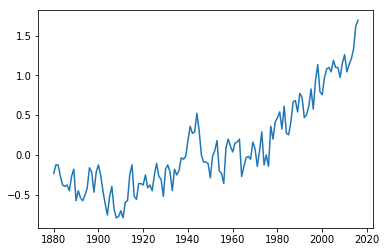

In [8]:
#first pass plotting examples - 
plt.plot(temperVarGlobal['Year'], temperVarGlobal['AnomalyF'])



#### This creates a super simple plot - what if we want this as a part of a figure? Check out the next cell...

Text(0.5,0,'Year')

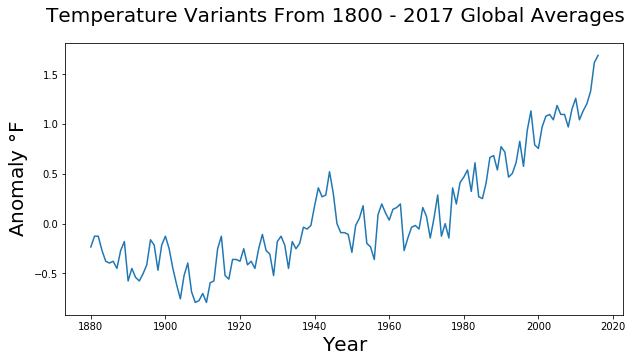

In [9]:
#define a figure (think of this as a page)
fig = plt.figure(figsize=(10, 5))

#let's give it a title
fig.suptitle('Temperature Variants From 1800 - 2017 Global Averages', fontsize=20)

#lets just make a line plot, worry about everything else later
plt.plot(temperVarGlobal['Year'], temperVarGlobal['AnomalyF'])

#and label some axis - note how the fontsize command
#is incredibly useful? 
plt.ylabel('Anomaly $\degree$F', fontsize = 20)
plt.xlabel('Year', fontsize = 20)

#SPECIAL NOTE using $COMMANDS$  in a text entry will enable symbols 
#through Latex - see special enabled commands here: 
#https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols

### So this is super basic matplotlib....
...

...

...

...

...

### And it is...not so nice looking. What do we want to do here?

...

...

...

...

...

Let's try fixing it up so that we can:

- Adjust the labelsize 
- Tell if it's below or above zero which is really the main point of this chart...

Let's learn how to make this a publication ready chart by adding some nifty features.

### Part 4: Create Explanatory Graphic Demonstrating Trend

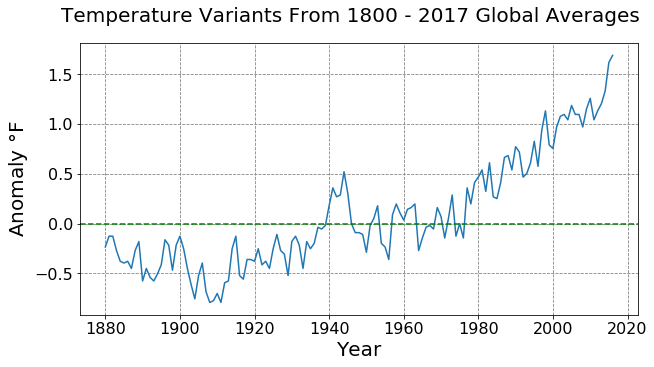

In [10]:
#Note anything within the comment bars are additions to the figure. 


#set up the "figure size"
fig = plt.figure(figsize=(10, 5))
#make suptitle
fig.suptitle('Temperature Variants From 1800 - 2017 Global Averages', fontsize=20)

#plot it
plt.plot(temperVarGlobal['Year'], temperVarGlobal['AnomalyF'])

#label it
plt.ylabel('Anomaly $\degree$F', fontsize = 20)
plt.xlabel('Year', fontsize = 20)


#ADDED THE FOLLOWING TO MAKE IT NICER LOOKING
#----------------------------------------- 
plt.xticks(fontsize=16) #make the xaxis labels larger
plt.yticks(fontsize=16) #make the yaxis labels larger
plt.axhline(y=0.0, color='g', linestyle='--') #add a horizontal line at 0
plt.grid(color='gray', linestyle='dashed') #add a grid so it's easier to tell if at zero
#-----------------------------------------



...

...


...









### Mmmmmm so this is getting better. 




...

...


...









But what we loose here is that we KNOW that each point has a definitive width of 1 year, it's an average over that year, the chaotic behavior of the line is more misleading than informative.

### Part 5: Iteration on Same Graphic

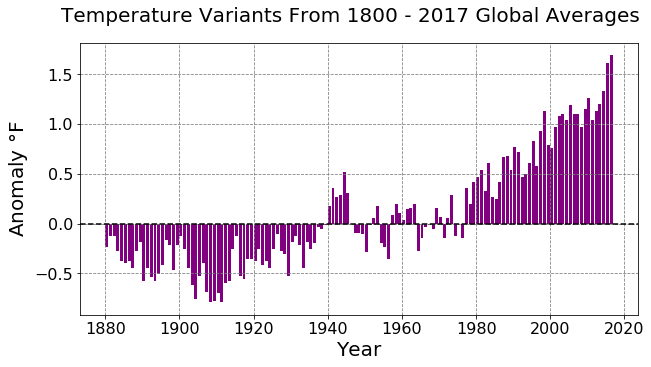

In [11]:
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Temperature Variants From 1800 - 2017 Global Averages', fontsize=20)

#----------------------------------------- we have edited this into a bar chart

#note we make it purple for fun ;)
#also the align = 'edge' will align to the left side of the range
#width = 0.8 rather than 1 simply to make it appear more interesting. Go ahead and play 
#with the width to see why it's at 0.8
plt.bar(temperVarGlobal['Year'], temperVarGlobal['AnomalyF'], width = 0.8, align='edge', 
        color = 'purple')
#----------------------------------------- 
plt.ylabel('Anomaly $\degree$F', fontsize = 20)
plt.xlabel('Year', fontsize = 20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axhline(y=0.0, color='k', linestyle='--')

plt.grid(color='gray', linestyle='dashed')


### So while purple was fun...we want to show when it's greater than zero, and less than zero. It would be best if these were actually different colors.

Remember how we set this equal to purple? This was done with hex code. 

We can also assign a column JUST for colors as a hex code value in our dataframe so that each bar could have different colors when we plot it. You could also just do this as making blue 'b', or red 'r', but let's use hex code just so we know how to. There are two more obvious ways to go about this. In both ways our goal is to create a NEW column in the data frame with the colors of the bars where if less than zero we make blue, greater than we make red.

(Side note - if you are curious about what exactly hex codes are check it out at [color-hex.com](http://www.color-hex.com/))

Way 1)

- The tried and true method of using a for loop to loop over every data value in our array, create a new column, and fill with what color we want it to be. This would be a common way to deal with this issue. Loop through, check each value...but what if you have so much data, that this for loop takes forever to run?

Way 2)

- Slightly "pythonic" ie it uses the inbuilt methods of objects (in this case dataframes) to avoid writing extensive loop structures.


### We are going to show you way 2 - however if way 1 makes more sense to you, it is availiable at the following [data visualization guide](https://github.com/astro-abby/data_vis_statistics_geosciences).




#### Step 1 - setting up something called a Boolean Index


In [12]:

#First we set up what's called a Boolean Index.

booleanIndex = temperVarGlobal['AnomalyF'] > 0

#let's see what the heck this did! 
print(booleanIndex[0:10])



0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: AnomalyF, dtype: bool


In [13]:
#let's see what the heck this did! 
print(booleanIndex.tail(n=10))

127    True
128    True
129    True
130    True
131    True
132    True
133    True
134    True
135    True
136    True
Name: AnomalyF, dtype: bool


In [14]:
#side note - the ~ symbol flips the value of the index
print(~booleanIndex[0:10])


0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: AnomalyF, dtype: bool



#### Step 2 - Using the boolean as an index for the colors


In [15]:
#Next we set up the values for colors 

#we create a new column only of k, which is the Python code for color black
#then if we set up the colors in this column incorrectly we will know
temperVarGlobal['Colors'] = 'k'

#next we set up using the .loc method, the colors we want. 

#remember how the ~ flips the value?
temperVarGlobal.loc[booleanIndex, 'Colors'] = '#9F4E58' 
temperVarGlobal.loc[~booleanIndex, 'Colors'] = '#64ACEA'

#temperVarGlobal.loc[temperVarGlobal['AnomalyF'] > 0, 'Colors'] = '#9F4E58' 
#temperVarGlobal.loc[temperVarGlobal['AnomalyF'] < 0, 'Colors'] = '#9F4E58' 


#and set the colors up here we use hex code

#let's see what this looks like now by printing the first
#10 rows and ALL the columns, reminder : means all
print(temperVarGlobal.loc[0:10, :])


    Year  AnomalyC  AnomalyF   Colors
0   1880     -0.13    -0.234  #64ACEA
1   1881     -0.07    -0.126  #64ACEA
2   1882     -0.07    -0.126  #64ACEA
3   1883     -0.15    -0.270  #64ACEA
4   1884     -0.21    -0.378  #64ACEA
5   1885     -0.22    -0.396  #64ACEA
6   1886     -0.21    -0.378  #64ACEA
7   1887     -0.25    -0.450  #64ACEA
8   1888     -0.15    -0.270  #64ACEA
9   1889     -0.10    -0.180  #64ACEA
10  1890     -0.32    -0.576  #64ACEA


#### Step 3 - PLOT!

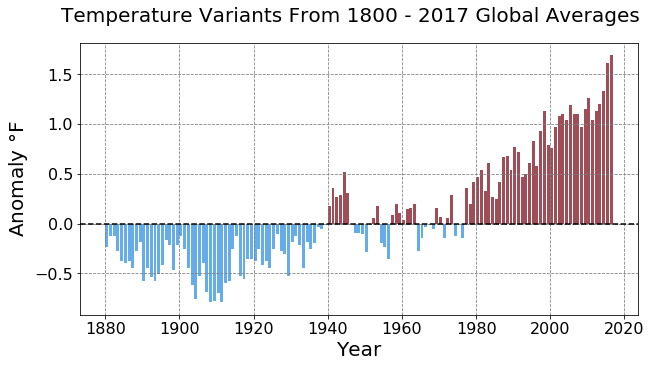

In [16]:

fig = plt.figure(figsize=(10, 5))
fig.suptitle('Temperature Variants From 1800 - 2017 Global Averages', fontsize=20)

#------------------------------------------------  we edited the following color statement 
#ONLY

plt.bar(temperVarGlobal['Year'], temperVarGlobal['AnomalyF'], width = 0.8, align='edge', 
        color = temperVarGlobal['Colors'])
#------------------------------------------------

plt.ylabel('Anomaly $\degree$F', fontsize = 20)
plt.xlabel('Year', fontsize = 20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axhline(y=0.0, color='k', linestyle='--')

plt.grid(color='gray', linestyle='dashed')


#note to save the figure you can do so as - go see it in your folder!
plt.savefig('./Figures/TempVariants.png')

Now this has been rather fun, you've learned how to set up AND SAVE a basic plot and make it absolutely gorgeously informative! This is the point where we learn how to do more than 1 plot on a figure. Depending on time we might skip to the summary. BUT make note of this to return to later if we have to move onwards! 

...

...

...

### Part 6 - Dealing with Other Types of Data and Datetime Objects

This has all been fine...but what if we want to deal with multiple datasets with different time cadences? Let's say sometimes we have data for certain years but not others? 

In [17]:
#Here we are importing two datasets - 

#this first dataset is the average wintering location for North American birds
#bird ranges over the last 40 years since 1966

#DATA DESCRIPTION:
##### Source: 
##### https://www.epa.gov/climate-indicators/climate-change-indicators-bird-wintering-ranges
##### Original report and compilation can be found at the Audobon Society website
##### http://web4.audubon.org/bird/bacc/techreport.html

##### Each winter (mid Dec - early January) the Audobon society collect bird count and location
##### of wintering habitats

birdRangeAvrg = pd.read_csv('./Data/birdRanges_40yearAvrg.csv', header = 6)

#the second dataset represents the bird species that went into the previous time series
#analysis with each species and summary data over previous 40 years

birdSpecies = pd.read_csv('./Data/birdSpecies.csv', 
                            header = 2)

In [18]:

#Let's check out data again make sure it imported correctly - 

print(birdRangeAvrg.head())

print(birdSpecies.columns)



   year  mean distance (miles)  lower confidence (miles)  \
0  1966               0.000000                  0.000000   
1  1967               1.234169                 -4.391334   
2  1968               8.599031                  3.225097   
3  1969               2.295872                 -4.008747   
4  1970               3.007815                 -3.183284   

   upper confidence (miles)  
0                  0.000000  
1                  6.859673  
2                 13.972964  
3                  8.600492  
4                  9.198914  
Index(['Species', 'Scientific_name', 'Habitat Guild (3 classes)',
       'Habitat Guild (5 classes)', 'Feeder use',
       'Mean latitude (40-year ave from regression)',
       'Latitudinal distance moved (miles)', 'Lat. direction moved',
       'F-value latitude slope', 'p-value slope',
       'Mean dist. from coast (40-yr ave. from regression)',
       'Change in mean dist. from coast (miles)', 'Shifted inland or to coast',
       'F-value slope dist. t

### Create Date Time Index

Up to now our indexes of the Pandas dataframes have been numbers - ranging from 0 to the length of the dataframe. What if instead we could have these be datetime objects?

Why would we want to do this? This let's us do matching with specific indexes by time. This can be super useful when plotting which is why we are showing this to you. As a bonus, it also allows us to show mutliple plots on 1 figure so... 

In [19]:
#reminder of what datetime is

#create a datetime object
exObject = dt.datetime(2016, 5, 16)
#print it and show what "type" of object it is - 
print(exObject)
print(type(exObject))

2016-05-16 00:00:00
<class 'datetime.datetime'>


In [20]:
#datetimes are cool because you can do things like this with them...

print(exObject.month)
print(exObject.day)

#notice - hour ends up being 0? This is because we never set it up - 
print(exObject.hour)

5
16
0


In [21]:
#let's set up the INDEX of our dataframes to datetime objects

#what these commands do is take a column of a certain format, and convert it into 
#a datetime object

birdRangeAvrg.index = pd.to_datetime(birdRangeAvrg['year'], infer_datetime_format = False, 
                                       format = '%Y')

temperVarGlobal.index = pd.to_datetime(temperVarGlobal['Year'], infer_datetime_format = False, 
                                       format = '%Y')

### Well that was rather not exciting. Go ahead and print out .head of the temperVarGlobal now. What do you notice about the data on the left now?

In [22]:
print(temperVarGlobal.head(n=6))

            Year  AnomalyC  AnomalyF   Colors
Year                                         
1880-01-01  1880     -0.13    -0.234  #64ACEA
1881-01-01  1881     -0.07    -0.126  #64ACEA
1882-01-01  1882     -0.07    -0.126  #64ACEA
1883-01-01  1883     -0.15    -0.270  #64ACEA
1884-01-01  1884     -0.21    -0.378  #64ACEA
1885-01-01  1885     -0.22    -0.396  #64ACEA


In [23]:
#What we did just enabled nonsense like:
birdRangeAvrg.index.year

#this can be incredibly useful. Now you can arrange datasets by time and cadence.

Int64Index([1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
            1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
            1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
            1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
            2010, 2011, 2012, 2013],
           dtype='int64', name='year')

### What happens if we want to plot a datetime index now?

Within the following plotting command block you can see some changes, we are still using plt.plot but you can also see we are plotting on the index with the to_pydatetime() command. If you just try and plot the index you will get an error. 

You can also see our use of alpha to turn things transparent. 

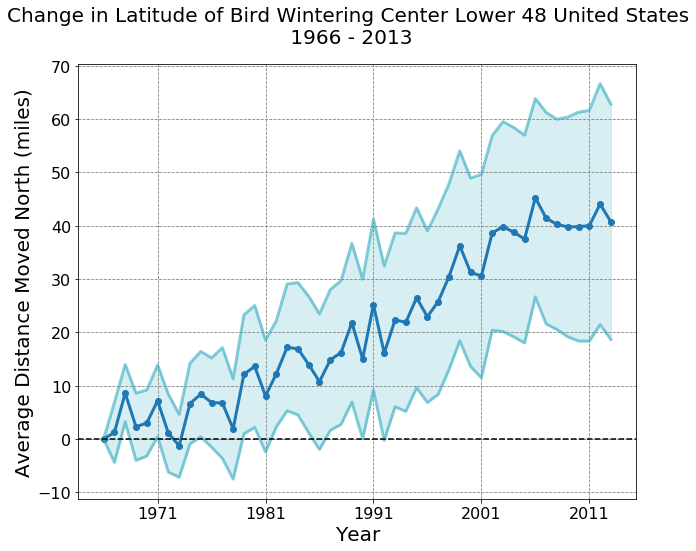

In [24]:
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Change in Latitude of Bird Wintering Center Lower 48 United States' + 
             '\n 1966 - 2013', fontsize=20)

plt.plot(birdRangeAvrg.index.to_pydatetime(), 
         birdRangeAvrg['mean distance (miles)'], 
         lw = 3, marker = 'o') # main line

plt.plot(birdRangeAvrg.index.to_pydatetime(), 
         birdRangeAvrg['upper confidence (miles)'], 
         lw = 3, alpha = 0.6, color = '#39AEC2')
plt.plot(birdRangeAvrg.index.to_pydatetime(), 
         birdRangeAvrg['lower confidence (miles)'], 
         lw = 3, alpha = 0.6, color = '#39AEC2')

#fill in region between the two boundary lines - note the alpha command?
plt.fill_between(birdRangeAvrg.index.to_pydatetime(),
                 birdRangeAvrg['lower confidence (miles)'], 
                 birdRangeAvrg['upper confidence (miles)'], 
                 alpha = 0.2, color = '#39AEC2')

plt.ylabel('Average Distance Moved North (miles)', fontsize = 20)
plt.xlabel('Year', fontsize = 20)

plt.xticks(fontsize=16) #make the xaxis labels larger
plt.yticks(fontsize=16) #make the yaxis labels larger
plt.axhline(y=0.0, color='k', linestyle='--') #add a horizontal line at 0

plt.grid(color='gray', linestyle='dashed') #add a grid so it's easier to tell if at zero

#### What if not only do we want to know at the same time, the global temperature anomaly data over the same period?


### Part 7: Making Mulitfigure Plot with Scatter and Datetime Indexing


The following plot is a pretty big jump from the previous one, in particular we added the use of gridspec to have multiplots and used indexing to match the same datetime indexes. This is mostly here for your use in the future and refer back to. The indexing in particular is a little tricky, but it's here for referencing. 

In [25]:
#We can use the .loc command to index into ONE data frame at only the cadence 
#of ANOTHER dataframe - this can be super useful. 

#for example, let's say we only want the index where birdRangeAvrg is valid?
print(temperVarGlobal.loc[birdRangeAvrg.index, :])

            Year  AnomalyC  AnomalyF   Colors
year                                         
1966-01-01  1966     -0.02    -0.036  #64ACEA
1967-01-01  1967     -0.01    -0.018  #64ACEA
1968-01-01  1968     -0.03    -0.054  #64ACEA
1969-01-01  1969      0.09     0.162  #9F4E58
1970-01-01  1970      0.04     0.072  #9F4E58
1971-01-01  1971     -0.08    -0.144  #64ACEA
1972-01-01  1972      0.03     0.054  #9F4E58
1973-01-01  1973      0.16     0.288  #9F4E58
1974-01-01  1974     -0.07    -0.126  #64ACEA
1975-01-01  1975      0.00     0.000  #64ACEA
1976-01-01  1976     -0.08    -0.144  #64ACEA
1977-01-01  1977      0.20     0.360  #9F4E58
1978-01-01  1978      0.11     0.198  #9F4E58
1979-01-01  1979      0.23     0.414  #9F4E58
1980-01-01  1980      0.26     0.468  #9F4E58
1981-01-01  1981      0.30     0.540  #9F4E58
1982-01-01  1982      0.18     0.324  #9F4E58
1983-01-01  1983      0.34     0.612  #9F4E58
1984-01-01  1984      0.15     0.270  #9F4E58
1985-01-01  1985      0.14     0.2

#### Notice how the start and the end are different now? It ends at 1966! Not at 1981...

#### Let's put this into place in our plot...

[]

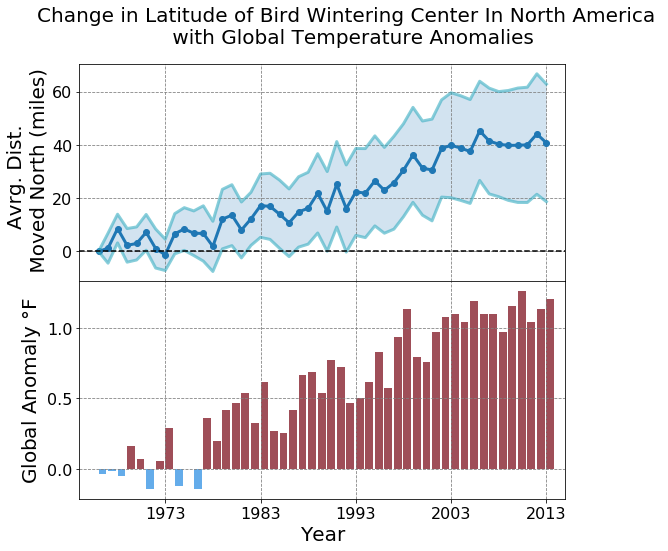

In [26]:

fig = plt.figure(figsize=(10, 8))
#added newline character to make multilevel title
fig.suptitle('Change in Latitude of Bird Wintering Center In North America \n with '+ 
             'Global Temperature Anomalies', fontsize=20)

#By using the gridspec command we can set up mutliple plotting objects on the 
#same figure
#----------------------THIS IS NEW!!!!
gs = plt.GridSpec(2, 1, hspace=0.0, wspace=0.0, right = 0.8)

#add axis to then plot out the data
ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1,:])
#----------------------THIS IS NEW!!!!

#plot the bird range - the order does NOT MATTER
ax1.plot(birdRangeAvrg.index.to_pydatetime(), birdRangeAvrg['mean distance (miles)'],    
         lw = 3, marker = 'o') # main line
ax1.plot(birdRangeAvrg.index.to_pydatetime(), birdRangeAvrg['upper confidence (miles)'], 
         lw = 3, alpha = 0.6, color = '#39AEC2')
ax1.plot(birdRangeAvrg.index.to_pydatetime(), birdRangeAvrg['lower confidence (miles)'], 
         lw = 3, alpha = 0.6, color = '#39AEC2')


#notice how our axis now can each have their own labels and how the command is different?
ax1.set_ylabel('Avrg. Dist. \n Moved North (miles)', fontsize = 20)

ax1.axhline(y=0.0, color='k', linestyle='--') #add a horizontal line at 0

ax1.fill_between(birdRangeAvrg.index.to_pydatetime(), 
                 birdRangeAvrg['lower confidence (miles)'], 
                 birdRangeAvrg['upper confidence (miles)'], alpha = 0.2)

ax1.grid(color='gray', linestyle='dashed')
ax1.tick_params(labelsize=16) #make the tick labels

#now let's add to plot two - remember before how we had a super long date axis?
#well now we are sharing the axis...how about we do just the same date range?
#remember how we spent so long on the datetime indexing??

#check out the following command with indexing - see how we are using the birdRangeAvrg.index? 
#to only get the years that are in the same range?

ax2.bar(temperVarGlobal.loc[birdRangeAvrg.index, :].index.to_pydatetime(), 
        temperVarGlobal.loc[birdRangeAvrg.index, 'AnomalyF'], 
        width = 300, align='edge', 
        color = temperVarGlobal.loc[birdRangeAvrg.index, 'Colors'])

ax2.set_ylabel('Global Anomaly $\degree$F', fontsize = 20)
ax2.set_xlabel('Year', fontsize = 20)

ax2.grid(color='gray', linestyle='dashed')

ax2.tick_params(labelsize=16)

#IMPORTANT!!!!
#when doing multiplots with hidden axis MAKE SURE to always set the limits of the axis for
#all axis so that the plots don't un-sync - try switching out these datetime 
#objects for other dates can be misleading

ax1.set_xlim([dt.datetime(1964, 1, 1), dt.datetime(2015, 1, 1)])
ax2.set_xlim([dt.datetime(1964, 1, 1), dt.datetime(2015, 1, 1)])


#note - if the axis on the upper plot starts to poke out - you can turn this off
#with the following command

ax1.set_xticklabels([])


# SUMMARY

From this lab you have learned the basics of python packages including: numpy, pandas, and matplotlib.pyplt, datetime, boolean indexing, and legends. 

In Python you can create exploratory graphics pretty quickly with simply doing plt.plot(). As you get better at creating explanatory graphics you can begin to do what we demonstrated at the end of the lecture and even more! Matplotlib has tons of uses we didn't even touch in this lecture. All matplotlib functions are extensively documented. You can find them through the [Matplotlib landing site](https://matplotlib.org/index.html), [through Googling help](https://www.google.com/search?ei=K9D8WoyKHOyUjwTNxZqoDQ&q=help+python+matplotlib+how+do+I+change+the+legend+placement%3F&oq=help+python+matplotlib+how+do+I+change+the+legend+placement%3F&gs_l=psy-ab.3...9186.15714.0.15952.39.35.0.0.0.0.316.3420.21j9j1j1.32.0....0...1.1.64.psy-ab..7.22.2269...33i21k1j33i160k1j33i22i29i30k1.0.rAc7r5tK4DI), and through this [extensive how to guide](https://github.com/astro-abby/data_vis_statistics_geosciences) on plotting with Climate and Space data.


Have fun exploring!  



-


-


-


-

### BONUS - Part 8: Making Mulitfigure Plot with Scatter and Datetime Indexing

What if not only do we want to know at the same time how many species moved north and how many moved south? Here we are dealing with both continuous (time series of temperatures and bird migration patterns) and categorical data (bird species).

Again this is a jump from the last plot - here we use two gridspec commands and a legend, and a scatterplot. We are showing you what is possible with Matplotlib - 

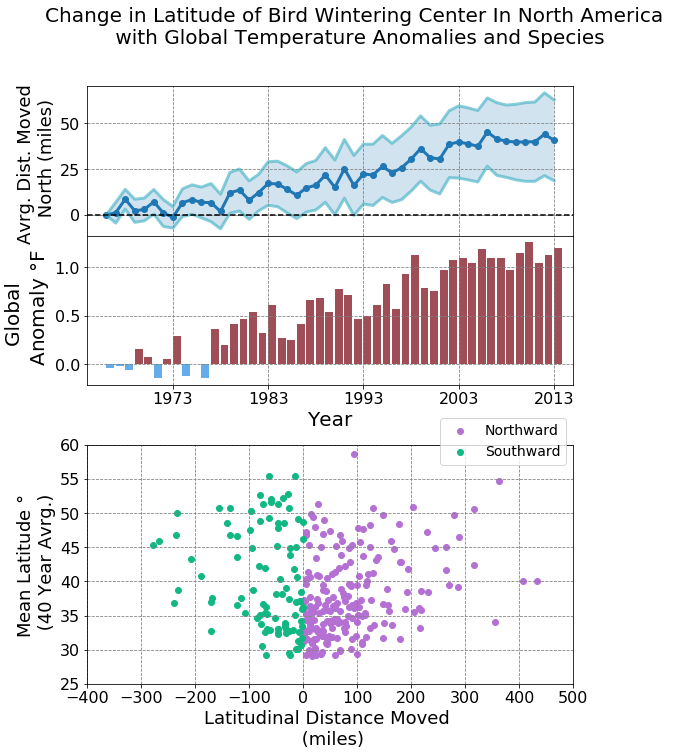

In [27]:
fig = plt.figure(figsize=(10, 11))

fig.suptitle('Change in Latitude of Bird Wintering Center In North America \n with '+ 
             'Global Temperature Anomalies and Species', fontsize=20)


#created two grids - one that divides into quarters and one by halfs
#notice the different hspace
gs_upper = plt.GridSpec(4, 1, hspace=0.0, wspace=0.0, right = 0.8)
gs_lower = plt.GridSpec(2, 1, hspace=0.5, wspace=0.0, right = 0.8)

#creating ax1 and ax2 for upper plots
ax1 = fig.add_subplot(gs_upper[0,:])
ax2 = fig.add_subplot(gs_upper[1,:])

#creating ax3 for lower plot
ax3 = fig.add_subplot(gs_lower[1,:])

#this is all the same as the above plot again
ax1.plot(birdRangeAvrg.index.to_pydatetime(), birdRangeAvrg['mean distance (miles)'],    
         lw = 3, marker = 'o') # main line
ax1.plot(birdRangeAvrg.index.to_pydatetime(), birdRangeAvrg['upper confidence (miles)'], 
         lw = 3, alpha = 0.6, color = '#39AEC2')
ax1.plot(birdRangeAvrg.index.to_pydatetime(), birdRangeAvrg['lower confidence (miles)'], 
         lw = 3, alpha = 0.6, color = '#39AEC2')


#notice how our axis now can each have their own labels and how the command is different?
ax1.set_ylabel('Avrg. Dist. Moved \n North (miles)', fontsize = 18)
#ax1.set_xlabel('Year', fontsize = 20) - REMOVED

ax1.axhline(y=0.0, color='k', linestyle='--') #add a horizontal line at 0

ax1.fill_between(birdRangeAvrg.index.to_pydatetime(), 
                 birdRangeAvrg['lower confidence (miles)'], 
                 birdRangeAvrg['upper confidence (miles)'], alpha = 0.2)

ax1.grid(color='gray', linestyle='dashed')
ax1.tick_params(labelsize=16) #make the tick labels


#add plot 2
#width in this case appears to be normalized to days
ax2.bar(temperVarGlobal.loc[birdRangeAvrg.index, :].index.to_pydatetime(), 
        temperVarGlobal.loc[birdRangeAvrg.index, 'AnomalyF'], 
        width = 300, align='edge', 
        color = temperVarGlobal.loc[birdRangeAvrg.index, 'Colors'])

ax2.set_ylabel('Global \n Anomaly $\degree$F', fontsize = 20)
ax2.set_xlabel('Year', fontsize = 20)


ax2.grid(color='gray', linestyle='dashed')

ax2.tick_params(labelsize=16)


#IMPORTANT!!!!
#when doing multiplots with hidden axis MAKE SURE to always set the limits of the axis for
#all axis so that the plots don't un-sync - try switching out these 
#datetime objects for other dates can be misleading
ax1.set_xlim([dt.datetime(1964, 1, 1), dt.datetime(2015, 1, 1)])
ax2.set_xlim([dt.datetime(1964, 1, 1), dt.datetime(2015, 1, 1)])


#note - if the axis on the upper plot starts to poke out - you can turn this off
#with the following command
ax1.set_xticklabels([])


#AND NOW for the third axis

#---------------ADDED COLORS AND LEGEND with indexing
#the label command syncs to the legend

indexN = (birdSpecies['Lat. direction moved'] == 'N')

ax3.scatter(birdSpecies.loc[indexN, 'Latitudinal distance moved (miles)'], 
            birdSpecies.loc[indexN, 'Mean latitude (40-year ave from regression)'], 
            color = '#B570D4', 
            label = 'Northward')

ax3.scatter(birdSpecies.loc[~indexN, 'Latitudinal distance moved (miles)'], 
            birdSpecies.loc[~indexN, 'Mean latitude (40-year ave from regression)'], 
            color = '#12B884',
            label = 'Southward')

ax3.set_xlabel('Latitudinal Distance Moved \n (miles)', fontsize = 18)
ax3.set_ylabel('Mean Latitude $\degree$ \n (40 Year Avrg.)', fontsize = 18)

#note how we set the limits
ax3.set_xlim([-400, 500])
ax3.set_ylim([25, 60])

#and setting up legend

#command in here is where the legend is placed.
#more info here: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html

#bbox sets location
#prop sets fontsize

#make sure to never overplot legend on data

#x and yin inches - requires labels in the plotting
#commands to label 
ax3.legend(bbox_to_anchor=(1, 1.14), prop={'size':14})

ax3.grid(color='gray', linestyle='dashed')
ax3.tick_params(labelsize=16) 

### BONUS -  Part 9: Making plots with Seaborn! 

In [28]:
import seaborn as sns
import matplotlib.ticker as ticker
#seaborn is a stats/graphic package based off of Matplotlib - 
#more can be found here https://seaborn.pydata.org/examples/index.html

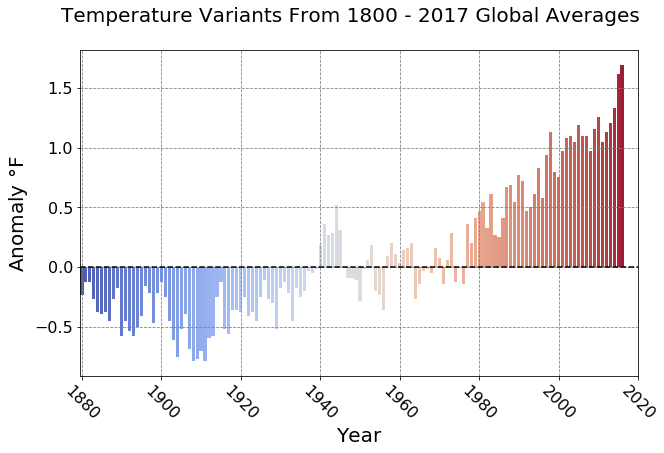

DatetimeIndex(['1880-01-01', '1881-01-01', '1882-01-01', '1883-01-01',
               '1884-01-01', '1885-01-01', '1886-01-01', '1887-01-01',
               '1888-01-01', '1889-01-01',
               ...
               '2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01',
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01'],
              dtype='datetime64[ns]', name='Year', length=137, freq=None)

In [29]:
#Example of similar bar plot - we do not set up any of the xtick axis for example 
#but you can see quickly how seaborn works like an add on to matplotlib

#set up location of axis plotter

fig = plt.figure(figsize=(10, 6))

fig.suptitle('Temperature Variants From 1800 - 2017 Global Averages', fontsize=20)

g = sns.barplot(temperVarGlobal['Year'], temperVarGlobal['AnomalyF'], palette="coolwarm")

plt.xticks([0, 20, 40, 60, 80, 100, 120, 140], ['1880', '1900', '1920', '1940', 
                                           '1960', '1980', '2000', '2020'])

g.tick_params(labelsize=16) 

plt.ylabel('Anomaly $\degree$F', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.xticks(rotation=-45) # rotate the x ticks
plt.axhline(y=0.0, color='k', linestyle='--') #add a horizontal line at 0
plt.grid(color='gray', linestyle='dashed')
plt.show()
temperVarGlobal.index


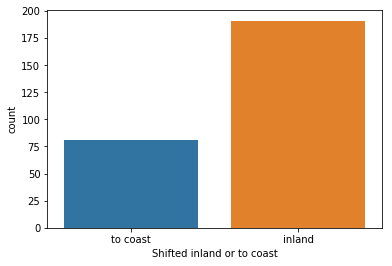

In [30]:
# Count Plot
sns.countplot(x ='Shifted inland or to coast', data = birdSpecies)

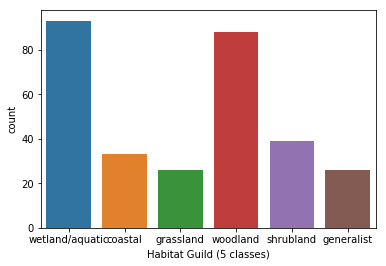

In [31]:
sns.countplot(x ='Habitat Guild (5 classes)', data = birdSpecies)

Index(['Species', 'Scientific_name', 'Habitat Guild (3 classes)',
       'Habitat Guild (5 classes)', 'Feeder use',
       'Mean latitude (40-year ave from regression)',
       'Latitudinal distance moved (miles)', 'Lat. direction moved',
       'F-value latitude slope', 'p-value slope',
       'Mean dist. from coast (40-yr ave. from regression)',
       'Change in mean dist. from coast (miles)', 'Shifted inland or to coast',
       'F-value slope dist. to coast', 'p-value slope dist. to coast',
       '# state or province strata',
       '40-year Median Trend (% change per year)', '95% LCI Trend',
       '95% UCI Trend', '% of hemispheric range in CBC survey area'],
      dtype='object')

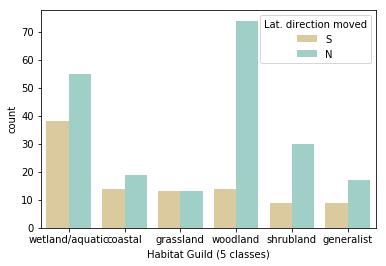

In [32]:
sns.countplot(x ='Habitat Guild (5 classes)', hue = 'Lat. direction moved', 
              data = birdSpecies, palette = 'BrBG')

birdSpecies.columns
